## Data Science in Marketing - Customer Segmentation 
---
This project aims to do the customer segmentation, by classifying customers based on the similarity of their characteristics. I'm using unsupervised machine learning techniques, which is K-prototypes, a combination of k-means and k-modes.


In [1]:
#import libraries
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler  
  
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes  

In [2]:
# import dataset  
df = pd.read_csv ("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")  

df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


### Data Exploration

In [4]:
#Assign the columns
num_col = ['Umur','NilaiBelanjaSetahun'] 
cat_col = ['Jenis Kelamin','Profesi','Tipe Residen'] 

C:\Users\Hp\anaconda3\envs\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\envs\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

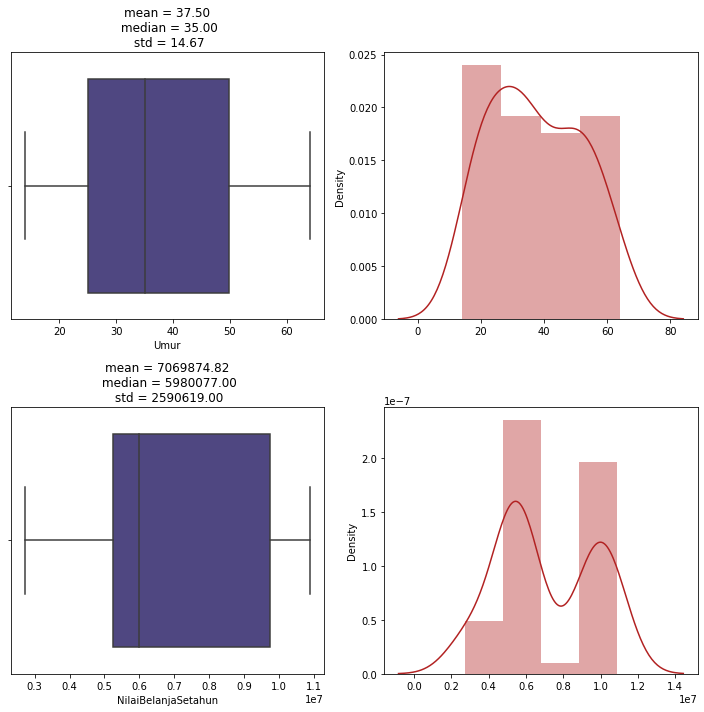

In [8]:
plt.clf()
  
def obv_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    for i, col in enumerate(features):
        sns.boxplot(x = df[col], ax = axs[i][0], color = 'darkslateblue')
        sns.distplot(x = df[col], ax = axs[i][1], color = 'firebrick')   
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[col].mean(), df[col].median(), df[col].std()))
    plt.tight_layout()
    plt.show()  
  
obv_num(num_col)

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df, order = df['Gender'].value_counts().index, palette = 'rocket')
plt.show()

<Figure size 432x288 with 0 Axes>

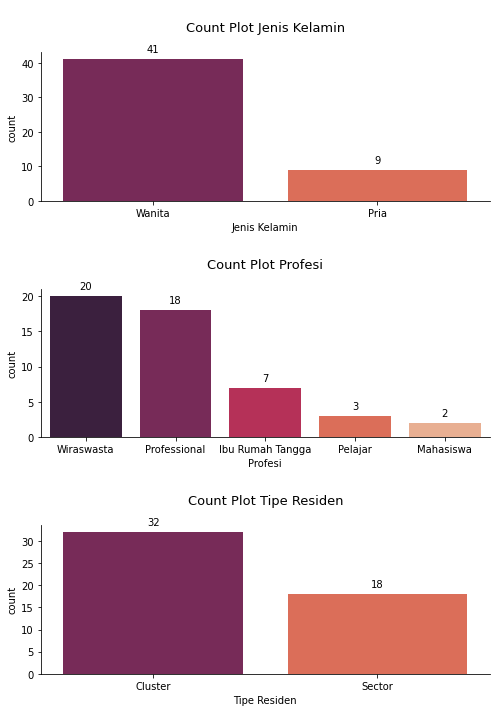

In [48]:
plt.clf()

fig, axs = plt.subplots(3,1,figsize=(7,10))
for i, col in enumerate(cat_col):  
    sns.countplot(x = df[col], order = df[col].value_counts().index, ax = axs[i],palette='rocket')  
    axs[i].set_title('\nCount Plot %s\n'%(col), fontsize=13)  
       
    for p in axs[i].patches:  
        axs[i].annotate(text = format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  va = 'center',  xytext = (0, 10),  textcoords = 'offset points') 
          
    sns.despine(right=True,top = True)  
    #axs[i].axes.yaxis.set_visible(False) 
    plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

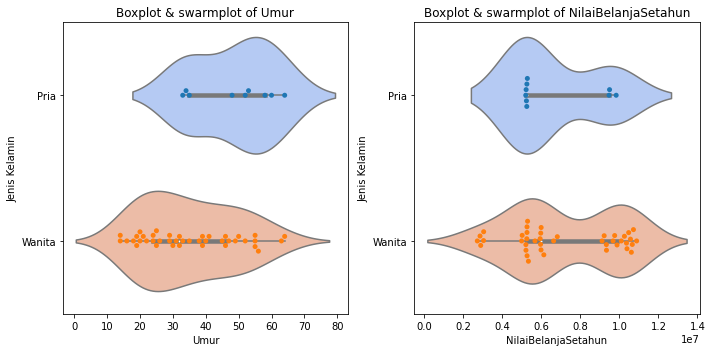

In [52]:
plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i, col in enumerate(num_col):
    sns.violinplot(x =df[col], y = 'Jenis Kelamin', data = df, ax = axs[i], palette ='coolwarm')
    sns.swarmplot(x = df[col] , y = 'Jenis Kelamin' , data = df, ax = axs[i])
    axs[i].set_title('Boxplot & swarmplot of {}'.format(col))
    
plt.tight_layout()
plt.show()

### Standardize Numerical Data & Convert Categorical Data 

In [54]:
# Standardize 
df_std = StandardScaler().fit_transform(df[num_col])  
  
# Dataframe
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[num_col].columns)   

In [55]:
df_encode = df[cat_col].copy()

# LabelEncoder for categorical data
for col in cat_col:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


In [56]:
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


# Clustering Using K-Prototypes

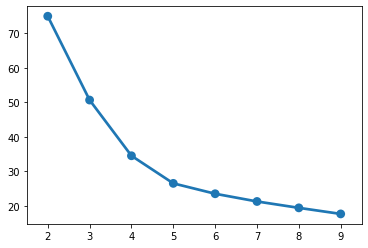

In [60]:
#perform elbow plot to determine the right number of cluster needed 
cost = {}
for k in range(2,10):
  kproto = KPrototypes(n_clusters = k, random_state=42)
  kproto.fit_predict(df_model, categorical=[0,1,2])
  cost[k]= kproto.cost_

sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

#choose k = 5 for the clusters

In [61]:
kproto = KPrototypes (n_clusters = 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

### Segmentation using Jenis Kelamin, Profesi, Tipe Residen, Umur, and NilaiBelanjaSetahun

In [62]:
#Determine the segmentation of customers
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('Customer segments: \n{}\n'.format(clusters))    
    
# Combine the original data with the cluster 
df_final = df.copy()    
df_final['cluster'] = clusters

Customer segments: 
[1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]



In [63]:
df_final.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,3


In [64]:
#Show the data in each clusters
for i in range (0,5):  
    print('\nCustomer in cluster: {}'.format(i))  
    print(df_final[df_final['cluster']==i])


Customer in cluster: 0
   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur    Profesi Tipe Residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    NilaiBelanjaSetahun  cluster  
1               2722700        0  
19              2896845        0  
30              3042773        0  
32              3047926        0  
39              2861855        0  

Customer in cluster: 1
   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007     Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013    

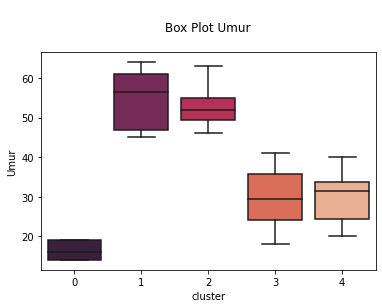

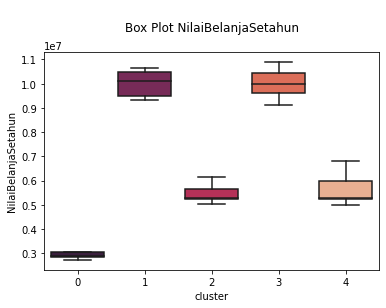

In [65]:
for i in num_col:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final, palette ='rocket')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

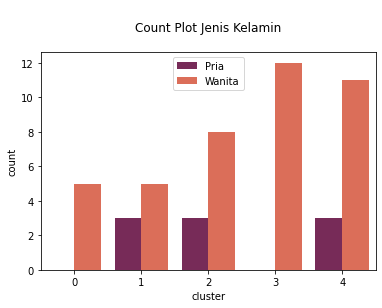

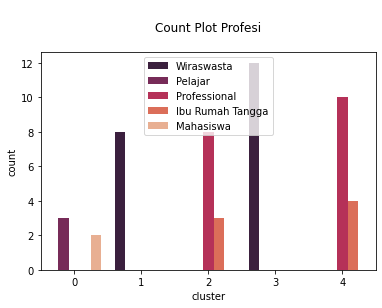

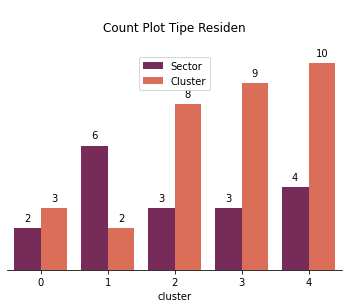

In [66]:
for i in cat_col:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i, palette = 'rocket' )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right=True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

In [67]:
#Mapping column-names
df_final['segment'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print("First 5 data with segment column :\n",df_final.head())  

First 5 data with segment column :
   Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster                segment  
0       Sector              9497927        1  Diamond Senior Member  
1      Cluster              2722700        0   Diamond Young Member  
2      Cluster              5286429        2          Silver Member  
3      Cluster              5204498        2          Silver Member  
4      Cluster             10615206        3      Gold Young Member  


In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segment              50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB


### Segmentation Results Explanation
* **Cluster 0**: Diamond Young Member, filled with entrepreneurs (18 - 41 years, avg age of 29 years) with average transaction value close to 10 million.
* **Cluster 1**: Diamond Senior Member,filled with entrepreneurs (45 - 64 years, avg age of 55 years) with average transaction value close to 10 million.
* **Cluster 2**: Silver Students, filled with students (avg age of 16 years) with average transaction value close to 3 million.
* **Cluster 3**: Gold Young Member, filled with professionals and housewives (20 - 40 years, avg age of 30 years) with average transaction value close to 6 million.
* **Cluster 4**: Gold Senior Member, filled with professionals and housewives (46 - 63 years, avg age of 53 years) with average transaction value close to 6 million.

### Testing the segmentation model

In [36]:
# New Data
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000},
    {
    'Customer_ID': 'CUST-101' ,  
    'Nama Pelanggan': 'Putri Arta' ,  
    'Jenis Kelamin': 'Wanita',  
    'Umur': 22,  
    'Profesi': 'Professional',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 4500000}
    ]  
   
new_df = pd.DataFrame(data)  

print(new_df)  

  Customer_ID Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-100           Joko  ...      Cluster              8230000
1    CUST-101     Putri Arta  ...      Cluster              4500000

[2 rows x 7 columns]


In [37]:
def data_preprocess(data):
    #Categorical data
    df_encode = data[cat_col].copy()

    #Jenis Kelamin
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({
    'Pria': 0,
    'Wanita' : 1
    })

    ## Profesi
    df_encode['Profesi'] = df_encode['Profesi'].map({
    'Ibu Rumah Tangga': 0,
    'Mahasiswa' : 1,
    'Pelajar': 2,
    'Professional': 3,
    'Wiraswasta': 4
    })

    ## Tipe Residen
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({
    'Cluster': 0,
    'Sector' : 1
    })

    #Numeric data
    df_std = data[num_col].copy()

    ## Standardize Umur
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7

    ## Standardize Nilai Belanja Setahun
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0

    # Combine categorical and numerical df
    df_model = df_encode.merge(df_std, left_index = True,
    right_index=True, how = 'left')

    return df_model

new_df_model = data_preprocess(new_df)

print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818
1              1        3             0 -1.054422            -0.991993


In [40]:
def modeling (data):
    clusters = kproto.predict(data,categorical=[0,1,2])
    return clusters

clusters = modeling(new_df_model)

print("Clusters for new dataframe", clusters)

Clusters for new dataframe [1 4]


In [41]:
def name_segment (data, clusters):
    final_df = data.copy()
    final_df['cluster'] = clusters

    # Naming the segments
    final_df['segmen'] = final_df['cluster'].map({
    0: 'Diamond Young Member',
    1: 'Diamond Senior Member',
    2: 'Silver Students',
    3: 'Gold Young Member',
    4: 'Gold Senior Member'
    })
    return final_df

new_final_df = name_segment(new_df,clusters)

print("New data results tested with segmentation model: \n", new_final_df)

New data results tested with segmentation model: 
   Customer_ID Nama Pelanggan  ... cluster                 segmen
0    CUST-100           Joko  ...       1  Diamond Senior Member
1    CUST-101     Putri Arta  ...       4     Gold Senior Member

[2 rows x 9 columns]


* Customer Joko assigned to cluster 1, the diamond senior member
* Customer Putri Arta assigned to cluster 4, the gold senior member